<a href="https://colab.research.google.com/github/Srabontideb/Image_Processing/blob/main/Morphological_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Morphological Image Processing**
* Morphological transformations are some simple operations based on the image shape.
* It is normally performed on binary images.
* It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('/content/clock2.jpg', cv2.IMREAD_GRAYSCALE)

### **Importing the Libraries:**
```
import cv2
import matplotlib.pyplot as plt
import numpy as np
```
The code begins by importing the required libraries: OpenCV, Matplotlib, and NumPy.

### **Loading the Grayscale Image:**
```
image = cv2.imread('/content/clock2.jpg', cv2.IMREAD_GRAYSCALE)
```
The image "clock2.jpg" is loaded into a NumPy array called image using OpenCV's imread() function. The second argument cv2.IMREAD_GRAYSCALE specifies that the image should be read in grayscale mode, which means the image will be converted to a single-channel grayscale representation.

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print("Kernel for Morphological Transformations")
print(kernel)

Kernel for Morphological Transformations
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


### **[EXPLANATION](https://)**
### **Importing the OpenCV Library:**
The code begins by importing the OpenCV library.

### **Creating the Kernel:**
The kernel for morphological transformations is created using the cv2.getStructuringElement() function. The first argument, cv2.MORPH_RECT, specifies the shape of the structuring element, which is a rectangle. The second argument (5, 5) specifies the size of the rectangular kernel as a tuple (rows, columns).

### **Printing the Kernel:**
The kernel is printed to the console using the print() function. The printed kernel will be a 2D array (NumPy array) representing the rectangular structuring element with dimensions (5, 5).

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

***Use the kernel displayed above for the following operations***

**Erosion**
* The basic idea of erosion is just like soil erosion, eroding away the boundaries of foreground object.
* The pixel in the original image will be considered only if all the pixels under the kernel is 1, otherwise it is eroded.

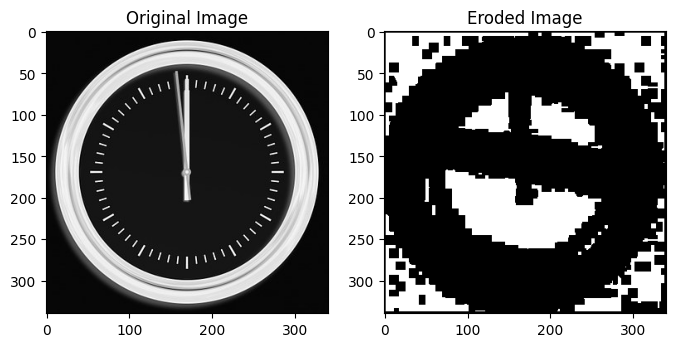

In [ ]:
# Perform Erosion operation, don't use built in function like erode or something like that.
# Getting the image dimensions
rows, cols = image.shape

# Creating an empty image for the eroded result
eroded_image = np.zeros_like(image)

# Performing Erosion manually using the specified kernel
for i in range(2, rows - 2):
    for j in range(2, cols - 2):
       # Extracting the region of interest (ROI) around the pixel
        region = image[i - 2:i + 3, j - 2:j + 3]
        # Performing bitwise AND operation between the ROI and the kernel
        result = region & kernel
        # Finding the minimum value in the result and assign it to the eroded_image
        eroded_image[i, j] = np.min(result)

# Displaying the original and eroded images side by side
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.show()

### **[EXPLANATION](https://)**
*   The **'eroded_image'** variable is used to store the result of the erosion operation.
*   The nested loops iterate over each pixel of the image, except for a 2-pixel border on each side. This avoids accessing out-of-bounds pixels when applying the kernel.
*   For each pixel, a 5x5 region of interest (ROI) around that pixel is extracted from the original image.
*   The bitwise AND operation region & kernel is performed between the extracted ROI and the kernel. This operation identifies if all the pixels under the kernel are 1.


*   The minimum value of the bitwise AND result is found using np.min(result), and this value is assigned to the corresponding pixel in the eroded_image.


*   Finally, the original grayscale image and the manually eroded image are displayed side by side using Matplotlib for comparison.


///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


**Dilation**
* It is just opposite of erosion.
* Here, a pixel element is considered if atleast one pixel under the kernel is 1.
* So it increases the white region in the image or size of foreground object increases.

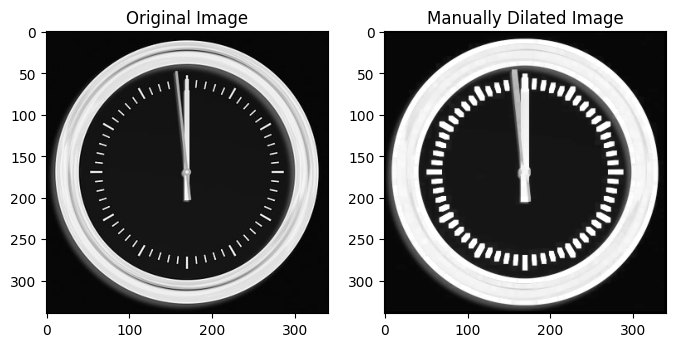

In [ ]:
# Perform dilation operation, don't use built in function like dilate or something like that.


# Getting the image dimensions
rows, cols = image.shape

# Creating an empty image for the dilated result
dilated_image = np.zeros_like(image)

# Performing Dilation manually using the specified kernel
for i in range(2, rows - 2):
    for j in range(2, cols - 2):
        # Extracting the region of interest (ROI) around the pixel
        region = image[i - 2:i + 3, j - 2:j + 3]

        # Performing bitwise OR operation between the ROI and the kernel
        result = region | kernel

        # Finding the maximum value in the result and assign it to the dilated_image
        dilated_image[i, j] = np.max(result)

# Displaying the original and dilated images side by side
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(dilated_image, cmap='gray')
plt.title('Manually Dilated Image')

plt.show()


### **[EXPLANATION](https://)**
*   The code initializes an empty image **'dilated_image'** to store the result of the dilation operation.


*   The nested loops iterate over each pixel of the image, except for a 2-pixel border on each side. This avoids accessing out-of-bounds pixels when applying the kernel.


*   For each pixel, a 5x5 region of interest (ROI) around that pixel is extracted from the original image.


*  The bitwise OR operation **'region | kernel'** is performed between the extracted ROI and the kernel. This operation identifies if any of the pixels under the kernel are 1.

*  The maximum value of the bitwise OR result is found using np.max(result), and this value is assigned to the corresponding pixel in the dilated_image.


*  Finally, the original grayscale image and the manually dilated image are displayed side by side using Matplotlib for comparison.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


**Opening**
* Opening is just another name of erosion followed by dilation.
* It is useful in removing noise.
* To implement the opening morphological process, the cv2.morphologyEx function is used.

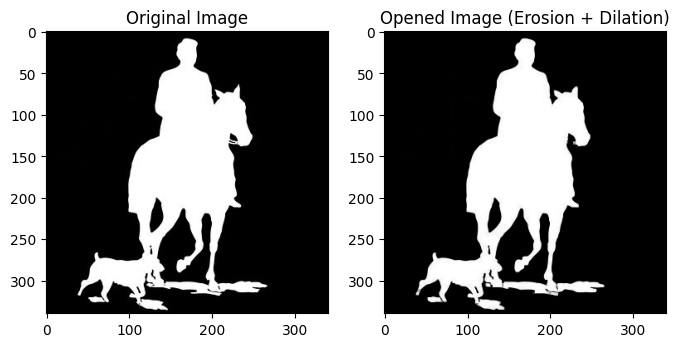

In [ ]:
# Perform opening operation

# Performing Erosion operation
eroded_image = cv2.erode(image, kernel)

# Performing Dilation operation on the eroded image
opened_image = cv2.dilate(eroded_image, kernel)

# Displaying the original and opened images side by side
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image (Erosion + Dilation)')

plt.show()

### **[EXPLANATION](https://)**


*   The cv2.erode() function is used to perform the Erosion operation on the original grayscale image using the specified kernel. This step removes small noise and background from the foreground objects.


*   The result of the Erosion operation (eroded_image) is then passed to the cv2.dilate() function to perform the Dilation operation using the same kernel. This step restores the main structure of the foreground objects while preserving the removal of noise and background.

*   Finally, the original grayscale image and the opened image (result of Erosion followed by Dilation) are displayed side by side using Matplotlib for comparison.

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



**Closing**
* Closing is reverse of Opening, Dilation followed by Erosion.
* It is useful in closing small holes inside the foreground objects, or small black points on the object.
* To implement the opening morphological process, the cv2.morphologyEx function is used.

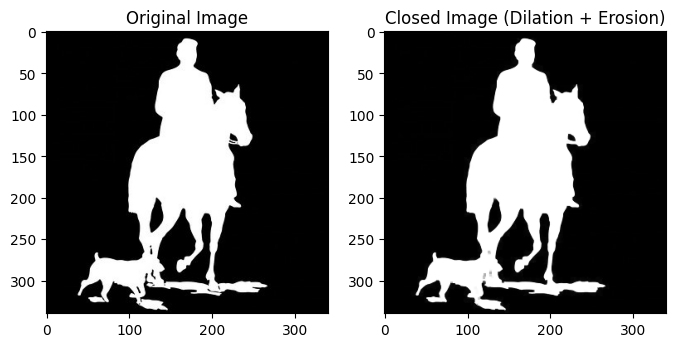

In [ ]:
# Perform closing operation

# Performing Dilation operation
dilated_image = cv2.dilate(image, kernel)

# Performing Erosion operation on the dilated image
closed_image = cv2.erode(dilated_image, kernel)

# Displaying the original and closed images side by side
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image (Dilation + Erosion)')

plt.show()

### **[EXPLANATION](https://)**


*   The cv2.dilate() function is used to perform the Dilation operation on the original grayscale image using the specified kernel. This step fills small holes and gaps in the foreground objects.


*   The result of the Dilation operation (dilated_image) is then passed to the cv2.erode() function to perform the Erosion operation using the same kernel. This step restores the main structure of the foreground objects while preserving the filling of small holes and gaps.

*   Finally, the original grayscale image and the closed image (result of Dilation followed by Erosion) are displayed side by side using Matplotlib for comparison.

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////





**Boundary Extraction**

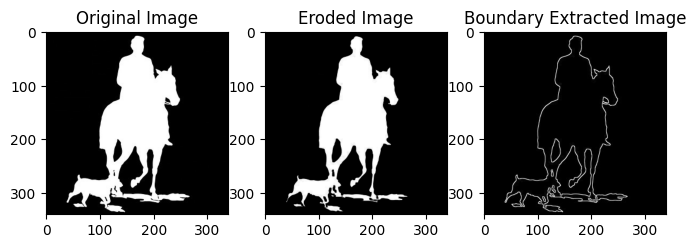

In [ ]:
# Perform boundary extraction

# Loading the color image "horse-dog.jpg"
image = cv2.imread('/content/horse-dog.jpg')

# Converting the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Creating the kernel for morphological Erosion operation
kernel = np.ones((3, 3), np.uint8)

# Performing Erosion operation
eroded_image = cv2.erode(gray_image, kernel)

# Calculating the boundary by subtracting the eroded image from the original grayscale image
boundary_image = gray_image - eroded_image

# Displaying the original image and the boundary extracted image side by side
plt.figure(figsize=(8,4))
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(133)
plt.imshow(boundary_image, cmap='gray')
plt.title('Boundary Extracted Image')

plt.show()


### **[EXPLANATION](https://)**
*   The code loads the color image "horse-dog.jpg" and converts it to grayscale using cv2.cvtColor().

*   We have created a kernel for the morphological Erosion operation, which is a 3x3 square with all ones.

*   The cv2.erode() function is used to perform the Erosion operation on the grayscale image using the specified kernel. This step helps to shrink the foreground object and extract its boundary.


*   The boundary is calculated by subtracting the eroded image from the original grayscale image using NumPy's array subtraction.

*   Finally, the original color image and the boundary-extracted image are displayed side by side using Matplotlib for comparison.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////